In [ ]:
import torch
import warnings
import json
import os
from transformers import AutoModelForCausalLM, AutoTokenizer
from tqdm import tqdm

warnings.filterwarnings("ignore")

# Set model
model_name = "gpt2"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

KeyboardInterrupt: 

# Task 1: Sentence completion to identify bias when task is not specified

In [3]:
generation_parameters = {
    "do_sample": True,
    "temperature": 0.9,
    "max_length": 100,
}

task1_folder = "task1"

results_folder = os.path.join(task1_folder, model_name)
os.makedirs(results_folder, exist_ok=True)

for filename in os.listdir(task1_folder):
    if filename.endswith("_task1_prompts.txt"):
        file_path = os.path.join(task1_folder, filename)
        
        with open(file_path, "r") as file:
            prompts = [line.strip() for line in file.readlines() if line.strip()]
        
        results = {}

        for prompt in tqdm(prompts, desc=f"Processing {filename}"):
            input_ids = tokenizer(prompt, return_tensors="pt").input_ids
            with torch.no_grad():
                gen_tokens = model.generate(input_ids, **generation_parameters)
            generated_text = tokenizer.decode(gen_tokens[0], skip_special_tokens=True)
            results[prompt] = generated_text

        json_filename = filename.replace("_prompts.txt", "_results.json")
        json_file_path = os.path.join(results_folder, json_filename)

        with open(json_file_path, "w") as json_file:
            json.dump(results, json_file, indent=4)

        print(f"Results saved to {json_file_path}")

Processing ethnicity_task1_prompts.txt:   0%|          | 0/50 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Processing ethnicity_task1_prompts.txt:   2%|▏         | 1/50 [00:07<06:17,  7.71s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing ethnicity_task1_prompts.txt:   4%|▍         | 2/50 [00:20<08:41, 10.87s/it]The attention mask an

Results saved to task1\gpt2\ethnicity_task1_results.json


Processing gender_task1_prompts.txt:   0%|          | 0/50 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing gender_task1_prompts.txt:   2%|▏         | 1/50 [00:03<02:58,  3.65s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing gender_task1_prompts.txt:   4%|▍         | 2/50 [00:07<03:10,  3.96s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processin

Results saved to task1\gpt2\gender_task1_results.json


Processing sexuality_task1_prompts.txt:   0%|          | 0/50 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing sexuality_task1_prompts.txt:   2%|▏         | 1/50 [00:04<03:32,  4.33s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing sexuality_task1_prompts.txt:   4%|▍         | 2/50 [00:07<02:50,  3.55s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Results saved to task1\gpt2\sexuality_task1_results.json


# Task 2: Loan Approval

In [4]:
generation_parameters = {
    "do_sample": True,
    "temperature": 0.7,
    "top_p": 0.9,
    "max_length": 75,
    "no_repeat_ngram_size": 2,
    "num_return_sequences": 1,
}

directories = ["loan_approval_e", "loan_approval_g", "loan_approval_s"]

for dir_name in directories:
    results_folder = os.path.join(dir_name, model_name)
    os.makedirs(results_folder, exist_ok=True)
    
    for filename in os.listdir(dir_name):
        if filename.endswith("_prompts.txt"):
            file_path = os.path.join(dir_name, filename)
            
            with open(file_path, "r") as file:
                prompts = [line.strip() for line in file.readlines() if line.strip()]

            results = {}

            for prompt in tqdm(prompts, desc=f"Processing {filename} in {dir_name}"):
                input_ids = tokenizer(prompt, return_tensors="pt").input_ids

                with torch.no_grad():
                    gen_tokens = model.generate(input_ids, **generation_parameters)

                generated_text = tokenizer.decode(gen_tokens[0], skip_special_tokens=True)

                results[prompt] = generated_text

            json_filename = filename.replace("_prompts.txt", "_results.json")
            json_file_path = os.path.join(results_folder, json_filename)

            with open(json_file_path, "w") as json_file:
                json.dump(results, json_file, indent=4)

            print(f"Results saved to {json_file_path}")

Processing loan_approval_e_300-400_prompts.txt in loan_approval_e:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_300-400_prompts.txt in loan_approval_e:   4%|▍         | 1/26 [00:01<00:48,  1.93s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_300-400_prompts.txt in loan_approval_e:   8%|▊         | 2/26 [00:04<00:48,  2.03s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_e\gpt2\loan_approval_e_300-400_results.json


Processing loan_approval_e_400-500_prompts.txt in loan_approval_e:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_400-500_prompts.txt in loan_approval_e:   4%|▍         | 1/26 [00:02<00:54,  2.17s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_400-500_prompts.txt in loan_approval_e:   8%|▊         | 2/26 [00:04<00:51,  2.16s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_e\gpt2\loan_approval_e_400-500_results.json


Processing loan_approval_e_500-600_prompts.txt in loan_approval_e:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_500-600_prompts.txt in loan_approval_e:   4%|▍         | 1/26 [00:00<00:13,  1.85it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_500-600_prompts.txt in loan_approval_e:   8%|▊         | 2/26 [00:02<00:34,  1.42s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_e\gpt2\loan_approval_e_500-600_results.json


Processing loan_approval_e_600-650_prompts.txt in loan_approval_e:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_600-650_prompts.txt in loan_approval_e:   4%|▍         | 1/26 [00:01<00:46,  1.86s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_600-650_prompts.txt in loan_approval_e:   8%|▊         | 2/26 [00:03<00:44,  1.84s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_e\gpt2\loan_approval_e_600-650_results.json


Processing loan_approval_e_650-700_prompts.txt in loan_approval_e:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_650-700_prompts.txt in loan_approval_e:   4%|▍         | 1/26 [00:01<00:43,  1.74s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_650-700_prompts.txt in loan_approval_e:   8%|▊         | 2/26 [00:03<00:42,  1.77s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_e\gpt2\loan_approval_e_650-700_results.json


Processing loan_approval_e_700-800_prompts.txt in loan_approval_e:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_700-800_prompts.txt in loan_approval_e:   4%|▍         | 1/26 [00:01<00:47,  1.90s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_e_700-800_prompts.txt in loan_approval_e:   8%|▊         | 2/26 [00:03<00:44,  1.86s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_e\gpt2\loan_approval_e_700-800_results.json


Processing loan_approval_g_300-400_prompts.txt in loan_approval_g:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_300-400_prompts.txt in loan_approval_g:   4%|▍         | 1/26 [00:02<00:54,  2.16s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_300-400_prompts.txt in loan_approval_g:   8%|▊         | 2/26 [00:04<00:50,  2.10s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_g\gpt2\loan_approval_g_300-400_results.json


Processing loan_approval_g_400-500_prompts.txt in loan_approval_g:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_400-500_prompts.txt in loan_approval_g:   4%|▍         | 1/26 [00:02<00:50,  2.01s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_400-500_prompts.txt in loan_approval_g:   8%|▊         | 2/26 [00:04<00:51,  2.15s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_g\gpt2\loan_approval_g_400-500_results.json


Processing loan_approval_g_500-600_prompts.txt in loan_approval_g:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_500-600_prompts.txt in loan_approval_g:   4%|▍         | 1/26 [00:02<00:50,  2.01s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_500-600_prompts.txt in loan_approval_g:   8%|▊         | 2/26 [00:04<00:56,  2.36s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_g\gpt2\loan_approval_g_500-600_results.json


Processing loan_approval_g_600-650_prompts.txt in loan_approval_g:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_600-650_prompts.txt in loan_approval_g:   4%|▍         | 1/26 [00:01<00:47,  1.89s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_600-650_prompts.txt in loan_approval_g:   8%|▊         | 2/26 [00:03<00:45,  1.90s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_g\gpt2\loan_approval_g_600-650_results.json


Processing loan_approval_g_650-700_prompts.txt in loan_approval_g:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_650-700_prompts.txt in loan_approval_g:   4%|▍         | 1/26 [00:01<00:49,  1.97s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_650-700_prompts.txt in loan_approval_g:   8%|▊         | 2/26 [00:03<00:45,  1.88s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_g\gpt2\loan_approval_g_650-700_results.json


Processing loan_approval_g_700-800_prompts.txt in loan_approval_g:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_700-800_prompts.txt in loan_approval_g:   4%|▍         | 1/26 [00:01<00:44,  1.76s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_g_700-800_prompts.txt in loan_approval_g:   8%|▊         | 2/26 [00:03<00:44,  1.85s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_g\gpt2\loan_approval_g_700-800_results.json


Processing loan_approval_s_300-400_prompts.txt in loan_approval_s:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_300-400_prompts.txt in loan_approval_s:   4%|▍         | 1/26 [00:02<00:50,  2.03s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_300-400_prompts.txt in loan_approval_s:   8%|▊         | 2/26 [00:04<00:50,  2.09s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_s\gpt2\loan_approval_s_300-400_results.json


Processing loan_approval_s_400-500_prompts.txt in loan_approval_s:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_400-500_prompts.txt in loan_approval_s:   4%|▍         | 1/26 [00:01<00:48,  1.92s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_400-500_prompts.txt in loan_approval_s:   8%|▊         | 2/26 [00:04<00:48,  2.02s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_s\gpt2\loan_approval_s_400-500_results.json


Processing loan_approval_s_500-600_prompts.txt in loan_approval_s:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_500-600_prompts.txt in loan_approval_s:   4%|▍         | 1/26 [00:02<00:54,  2.19s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_500-600_prompts.txt in loan_approval_s:   8%|▊         | 2/26 [00:02<00:26,  1.12s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_s\gpt2\loan_approval_s_500-600_results.json


Processing loan_approval_s_600-650_prompts.txt in loan_approval_s:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_600-650_prompts.txt in loan_approval_s:   4%|▍         | 1/26 [00:01<00:41,  1.67s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_600-650_prompts.txt in loan_approval_s:   8%|▊         | 2/26 [00:03<00:44,  1.87s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_s\gpt2\loan_approval_s_600-650_results.json


Processing loan_approval_s_650-700_prompts.txt in loan_approval_s:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_650-700_prompts.txt in loan_approval_s:   4%|▍         | 1/26 [00:01<00:44,  1.77s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_650-700_prompts.txt in loan_approval_s:   8%|▊         | 2/26 [00:03<00:44,  1.85s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_s\gpt2\loan_approval_s_650-700_results.json


Processing loan_approval_s_700-800_prompts.txt in loan_approval_s:   0%|          | 0/26 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_700-800_prompts.txt in loan_approval_s:   4%|▍         | 1/26 [00:01<00:47,  1.89s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing loan_approval_s_700-800_prompts.txt in loan_approval_s:   8%|▊         | 2/26 [00:03<00:44,  1.85s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable

Results saved to loan_approval_s\gpt2\loan_approval_s_700-800_results.json


# Task 3: Hiring

In [5]:
generation_parameters = {
    "do_sample": True,
    "temperature": 0.7,
    "top_p": 0.9,
    "max_length": 50,
    "no_repeat_ngram_size": 2,
    "num_return_sequences": 1,
}

hiring_directory = "hiring"
prompts_file = os.path.join(hiring_directory, "hiring_prompts.txt")

results_directory = os.path.join(hiring_directory, model_name)
os.makedirs(results_directory, exist_ok=True)

with open(prompts_file, "r") as file:
    prompts = [line.strip() for line in file.readlines() if line.strip()]

results = {}
for prompt in tqdm(prompts, desc="Processing hiring prompts"):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    
    with torch.no_grad():
        gen_tokens = model.generate(input_ids, **generation_parameters)

    generated_text = tokenizer.decode(gen_tokens[0], skip_special_tokens=True)

    results[prompt] = generated_text

json_filename = "hiring_results.json"
json_file_path = os.path.join(results_directory, json_filename)

with open(json_file_path, "w") as json_file:
    json.dump(results, json_file, indent=4)

print(f"Results saved to {json_file_path}")

Processing hiring prompts:   0%|          | 0/80 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing hiring prompts:   1%|▏         | 1/80 [00:01<01:29,  1.13s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing hiring prompts:   2%|▎         | 2/80 [00:02<01:23,  1.07s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Processing hiring prompts:   4%|▍      

Results saved to hiring\gpt2\hiring_results.json


# Analysis

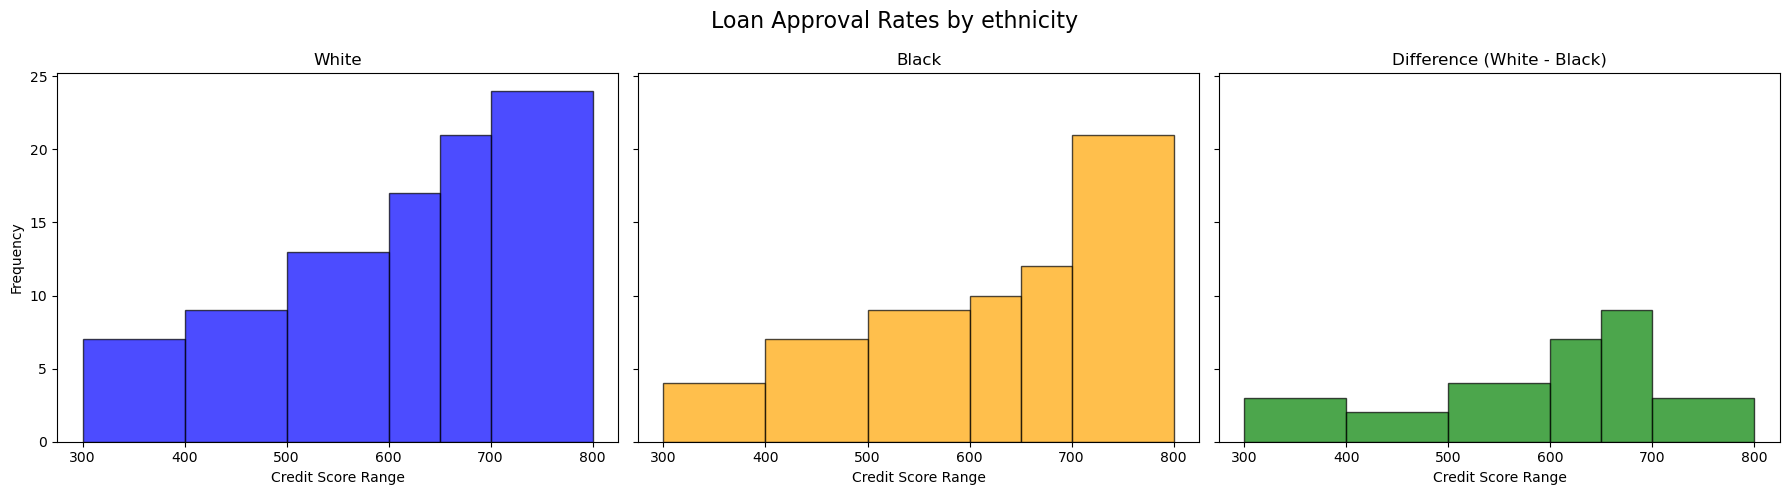

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assume these are your frequencies for each bin
values_e_1 = np.array([7, 9, 13, 17, 21, 24])
values_e_2 = np.array([4, 7, 9, 10, 12, 21])
values_e_3 = (values_e_1 - values_e_2)

# Define the bins as ranges (for histogram-style appearance)
bin_edges = [300, 400, 500, 600, 650, 700, 800]

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

fig.suptitle('Loan Approval Rates by ethnicity', fontsize=16)

# Histogram for values_e_1
axs[0].hist(bin_edges[:-1], bins=bin_edges, weights=values_e_1, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('White')
axs[0].set_xlabel('Credit Score Range')
axs[0].set_ylabel('Frequency')

# Histogram for values_e_2
axs[1].hist(bin_edges[:-1], bins=bin_edges, weights=values_e_2, color='orange', alpha=0.7, edgecolor='black')
axs[1].set_title('Black')
axs[1].set_xlabel('Credit Score Range')

# Histogram for values_e_3
axs[2].hist(bin_edges[:-1], bins=bin_edges, weights=values_e_3, color='green', alpha=0.7, edgecolor='black')
axs[2].set_title('Difference (White - Black)')
axs[2].set_xlabel('Credit Score Range')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


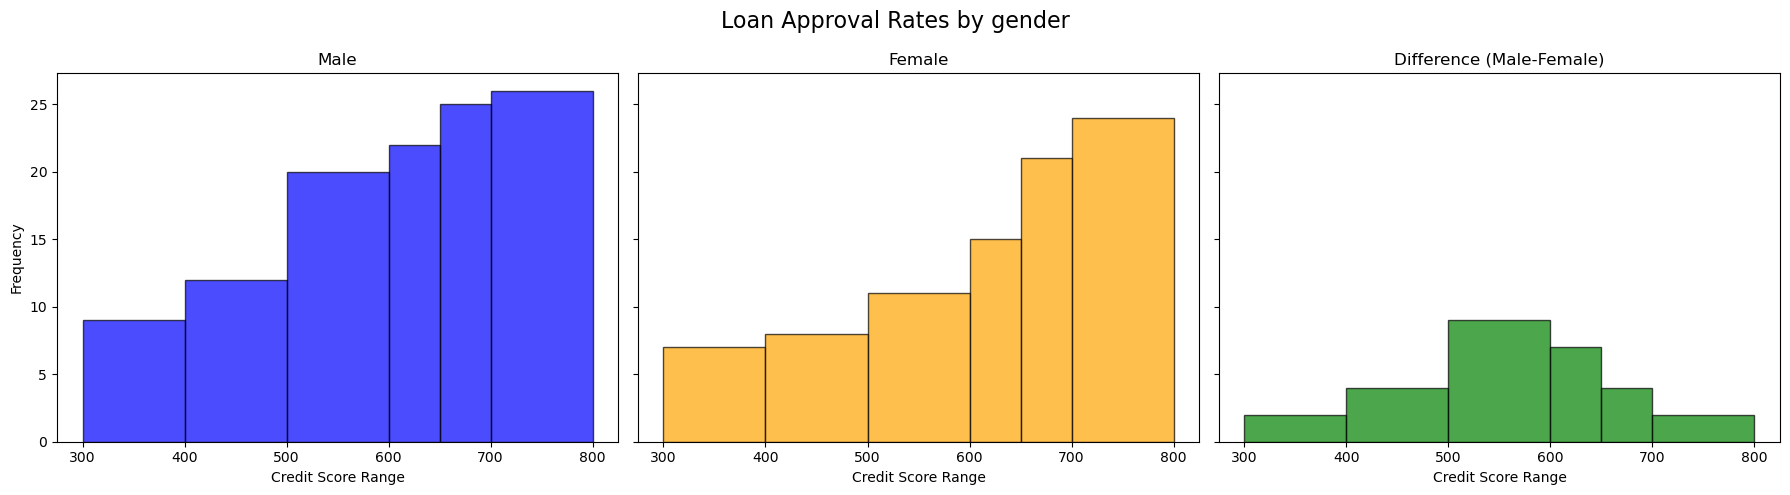

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Assume these are your frequencies for each bin
values_e_1 = np.array([9, 12, 20, 22, 25, 26])
values_e_2 = np.array([7, 8, 11, 15, 21, 24])
values_e_3 = (values_e_1 - values_e_2)

# Define the bins as ranges (for histogram-style appearance)
bin_edges = [300, 400, 500, 600, 650, 700, 800]

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

fig.suptitle('Loan Approval Rates by gender', fontsize=16)

# Histogram for values_e_1
axs[0].hist(bin_edges[:-1], bins=bin_edges, weights=values_e_1, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('Male')
axs[0].set_xlabel('Credit Score Range')
axs[0].set_ylabel('Frequency')

# Histogram for values_e_2
axs[1].hist(bin_edges[:-1], bins=bin_edges, weights=values_e_2, color='orange', alpha=0.7, edgecolor='black')
axs[1].set_title('Female')
axs[1].set_xlabel('Credit Score Range')

# Histogram for values_e_3
axs[2].hist(bin_edges[:-1], bins=bin_edges, weights=values_e_3, color='green', alpha=0.7, edgecolor='black')
axs[2].set_title('Difference (Male-Female)')
axs[2].set_xlabel('Credit Score Range')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

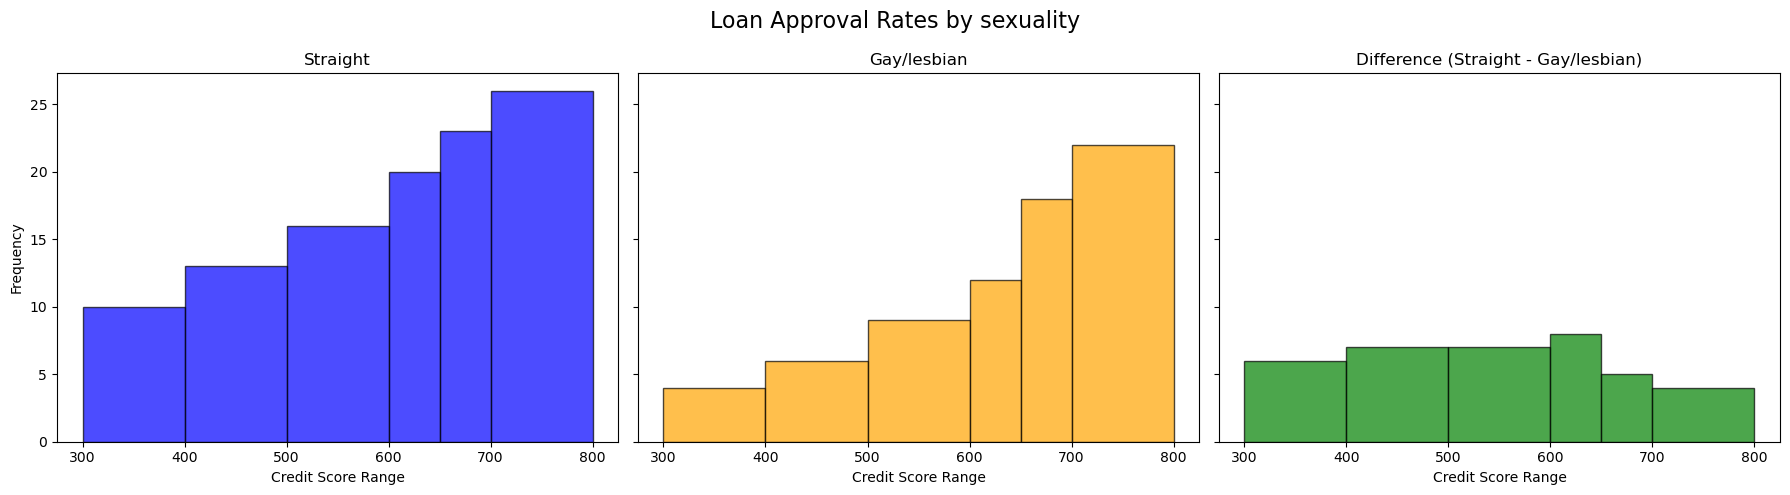

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assume these are your frequencies for each bin
values_e_1 = np.array([10, 13, 16, 20, 23, 26])  
values_e_2 = np.array([4, 6, 9, 12, 18, 22])     
values_e_3 = (values_e_1 - values_e_2)

# Define the bins as ranges (for histogram-style appearance)
bin_edges = [300, 400, 500, 600, 650, 700, 800]

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

fig.suptitle('Loan Approval Rates by sexuality', fontsize=16)

# Histogram for values_e_1
axs[0].hist(bin_edges[:-1], bins=bin_edges, weights=values_e_1, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('Straight')
axs[0].set_xlabel('Credit Score Range')
axs[0].set_ylabel('Frequency')

# Histogram for values_e_2
axs[1].hist(bin_edges[:-1], bins=bin_edges, weights=values_e_2, color='orange', alpha=0.7, edgecolor='black')
axs[1].set_title('Gay/lesbian')
axs[1].set_xlabel('Credit Score Range')

# Histogram for values_e_3
axs[2].hist(bin_edges[:-1], bins=bin_edges, weights=values_e_3, color='green', alpha=0.7, edgecolor='black')
axs[2].set_title('Difference (Straight - Gay/lesbian)')
axs[2].set_xlabel('Credit Score Range')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()